Reference: https://www.kaggle.com/general/207202

In [ ]:
# Importing Libraries
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [ ]:
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 32

In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_train.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_test.csv")

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

In [ ]:
X_train, X_testt, y_train, y_testt = train_test_split(X, y, train_size=5000, test_size=7200, random_state=random_state)

In [ ]:
X_train.shape

(5000, 28, 28, 1)

In [ ]:
X_testt.shape

(7200, 28, 28, 1)

In [ ]:
# CNN Model
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [ ]:
# optimizer used = adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

## Training the model

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1)

Epoch 1/100
157/157 [==============================] - 2s 6ms/step - loss: 1.0081 - accuracy: 0.6470
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 0.6887 - accuracy: 0.7508
Epoch 3/100
157/157 [==============================] - 1s 5ms/step - loss: 0.6179 - accuracy: 0.7806
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 0.5340 - accuracy: 0.8036
Epoch 5/100
157/157 [==============================] - 1s 5ms/step - loss: 0.5011 - accuracy: 0.8136
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4859 - accuracy: 0.8174
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4508 - accuracy: 0.8342
Epoch 8/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4216 - accuracy: 0.8450
Epoch 9/100
157/157 [==============================] - 1s 5ms/step - loss: 0.3818 - accuracy: 0.8582
Epoch 10/100
157/157 [==============================] - 1s 5ms/step - loss: 0.3880 - accura

## Adding Salt and Pepper Noise

In [ ]:
def salt_pepper(test_sequences,prob,salt=0,pepper=1):
  sampled_images = test_sequences
  for i in range(7200):
    for y in range(28):
      for x in range(28):
        r = np.random.random() 
        if r < prob:
          sampled_images[i][y][x] = salt
        elif r > 1-prob:
          sampled_images[i][y][x] = pepper
  return sampled_images

In [ ]:
for i in range(1,6,1):
  noise = salt_pepper(X_testt, i/100)

In [ ]:
noise__ = noise.reshape(X_testt.shape[0], 28, 28)

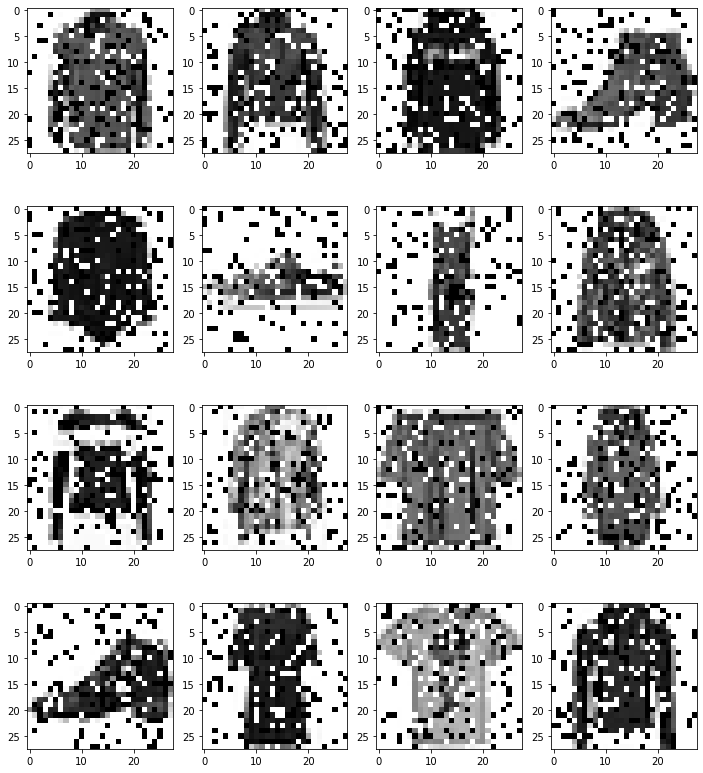

In [ ]:
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(noise__[i], cmap='binary')

### Testing 

In [ ]:
score = model.evaluate(X_testt, y_testt, steps=math.ceil(7200/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 1s 3ms/step - loss: 7.0513 - accuracy: 0.1853
Test loss: 7.051329135894775
Test accuracy: 0.1852777749300003


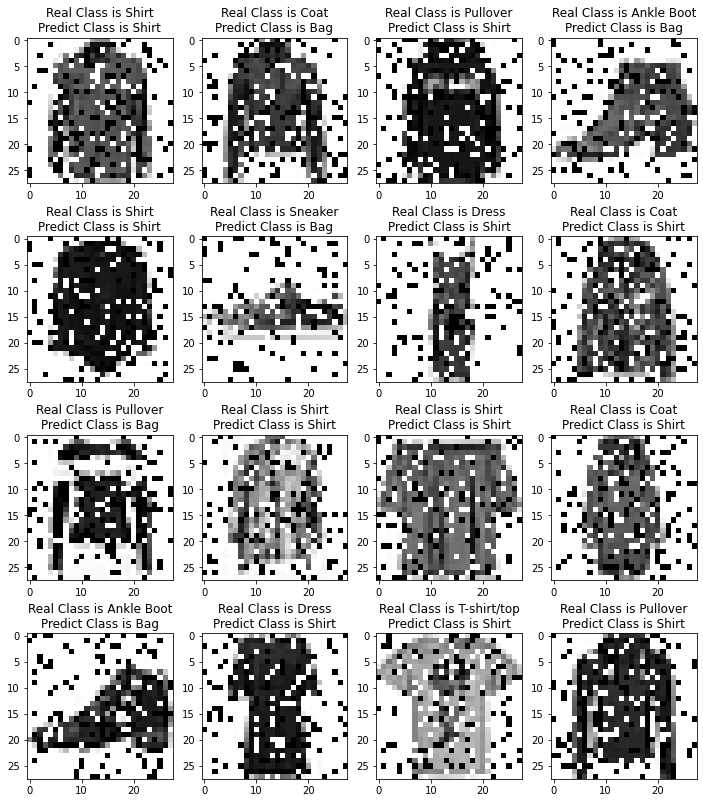

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(X_testt)
X_test__ = X_testt.reshape(X_testt.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_testt[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}");

In [ ]:
#Generate Plots
train_loss = train_model.history['loss']
train_acc = train_model.history['accuracy']
xc = range(No_epochs)

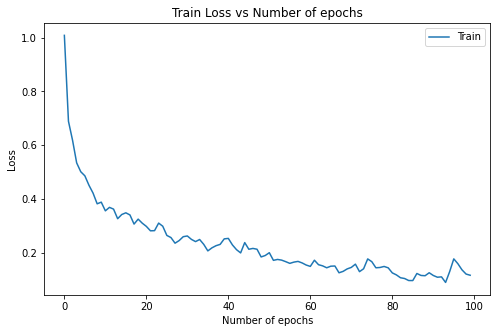

In [ ]:
plt.figure(1, figsize=(8,5))
plt.plot(xc,train_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Train Loss vs Number of epochs")
plt.legend(['Train'])
plt.savefig('Train_vs_epochs.png')

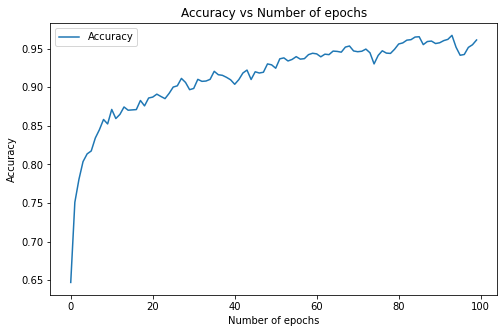

In [ ]:
plt.figure(2, figsize=(8,5))
plt.plot(xc,train_acc)
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of epochs")
plt.legend(['Accuracy'])
plt.savefig('Accuracy_vs_epochs.png')

## End of file